<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/Notebook_Module1_dg_pc_xp_vf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Mount Google Drive and extract project files
from google.colab import drive
drive.mount('/content/drive')

!rm -rf /content/ProjectModule1/ /content/codes /content/data /content/plots /content/utils /content/__MACOSX/ /content/notes.txt

!unzip -oq '/content/drive/My Drive/colab/ece246/tmp2/ProjectModule1.zip' -d /content/

!rsync -a --ignore-existing /content/ProjectModule1/ /content/

! [ -f /content/notes.txt ] && cat /content/notes.txt
!date > /content/notes.txt
!cat /content/notes.txt

!echo done

Mounted at /content/drive
Wed Feb 19 09:19:16 PM UTC 2025
done


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Section #1.1: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [3]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


<ipython-input-4-ab36d7fc405c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


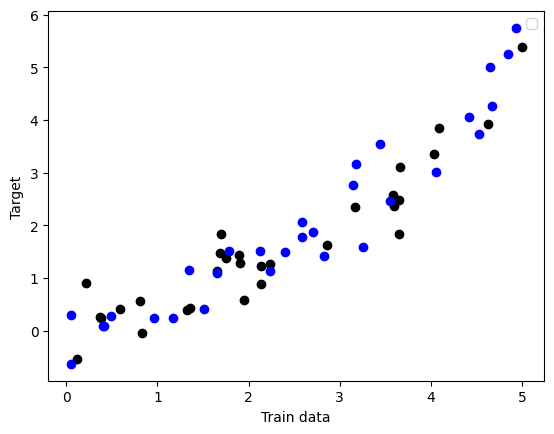

In [4]:
## PART (a):
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.legend()
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

# =========================
# PART 1(a)
# =========================

# 1(a) Visualization
#
# The training data (30 points) is plotted in black dots, and the test data (30 points)
# is plotted in blue dots. A linear model appears to be somewhat reasonable, though
# there is noticeable noise. Linear regression is likely to work reasonably well,
# but not perfectly.


# =========================
# PART 1(b)
# =========================

# 1(b) Linear Model Definition
#
# The linear model is defined as $h_w(x) = w0 + w1*x$, with a column of ones added to account for the intercept term (w0). In get_poly_features(m=1), the output feature matrix includes [1, x].


# =========================
# PART 1(c)
# =========================

# 1(c) "predict()" Function
#
# For m=1, "predict()" computes Xw, where X has shape (N, 2) and w has shape (2, 1).
# This produces predicted values for each sample.


In [5]:
from codes.Regression import Regression

In [6]:
## PART (d):
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.28238063301286
Gradient value [[ -3.19217252]
 [-10.44504584]]


# =========================
# PART 1(d)
# =========================

# 1(d) "loss_and_grad()" for Linear Regression
#
# The MSE loss is:
#   $J(w) = (1 / N) * Σ(h_w(x_n) - y_n)^2$.
# The gradient (unregularized) is $(2/N)*X^T*(Xw - y)$.
# Verification gave:
#   Loss ~ 4.28
#   Gradient ~ $[-3.19, -10.45]^T$


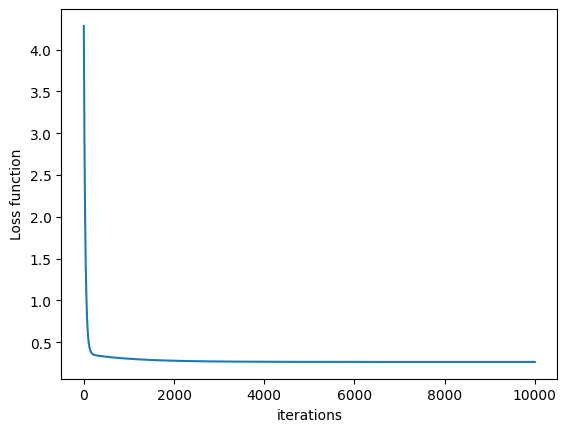

[[-0.37469204]
 [ 0.88377017]]
Final loss: 0.2641846537670642


In [7]:
## PART (e):
## Complete train_LR function in Regression.py file
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

# =========================
# PART 1(e)
# =========================

# 1(e) Training via Gradient Descent
#
# Using η=1e-3, batch_size=30, num_iters=10000,
# the final MSE is ~0.2642, and w ~ $[-0.3747, 0.8838]^T$.
# Different learning rates or batch sizes can alter convergence speed,
# but these settings converged effectively.


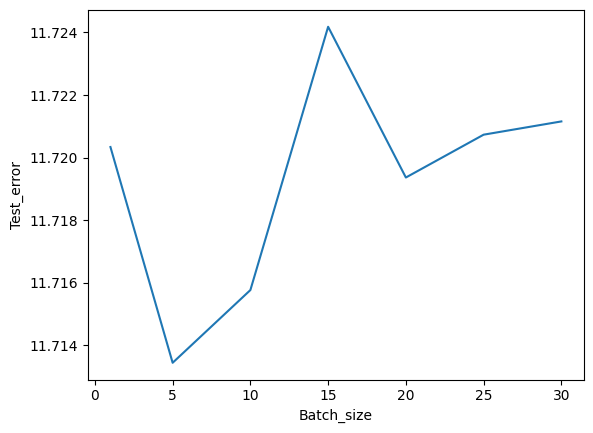

In [8]:
## PART (e) (Different Batch Sizes):
from numpy.linalg import norm
Batch = [1, 5, 10, 15, 20, 25, 30]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the linear regression for different batch size Avergae the test error over 10 times
# ================================================================ #
N = len(y_test)
for i,batch_size in enumerate(Batch):
    batch_test_err = []
    for _ in range(10):
        loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=batch_size, num_iters=10000)
        batch_test_err.append(norm(y_test - regression.predict(X_test))/np.sqrt(N)) # RMSE sqrt(sum_n{|y_n-w*x_n|^2}/N) = ||y - X*w||/sqrt(N)
    test_err[i] = np.mean(batch_test_err)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

In [9]:
## PART (f):
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.26417938203964436
Optimal solution gradient [[-0.37906992]
 [ 0.8852483 ]]


# =========================
# PART 1(f)
# =========================

# 1(f) Closed-Form Solution
#
# Solving $(X^T X)w = X^T$ y produces similar results:
#   Loss ~ 0.264179
#   w ~ $[-0.37907, 0.885248]^T$
# This consistency confirms correctness.


# =========================
# PART 1(g)
# =========================

# 1(g) Polynomial Regression
#
# For m >= 2, get_poly_features() generates $[1, x, x^2, ..., x^m]$.
# This allows polynomial fits of higher order.


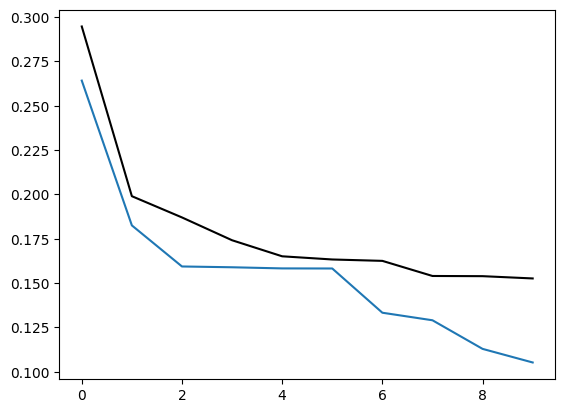

In [10]:
## PART (h):
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for m in range(1,11):
    regression = Regression(m=m)
    train_loss[m-1,:],_ = regression.closed_form(X_train,y_train)
    test_loss[m-1:],_ = regression.closed_form(X_test,y_test)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='black')
plt.show()

# =========================
# PART 1(h)
# =========================

# 1(h) Overfitting with Degrees m=1..10
#
# The closed-form solver was used for polynomial degrees 1 to 10.
# Lower degrees can underfit, whereas higher degrees can overfit.
# A moderate degree (like 3 or 4) usually yields the best generalization.


# =========================
# PART 1(i)
# =========================

# 1(i) L1 Regularization
#
# An L1 penalty, $λ * ||w||_1$, is added to the MSE objective.
# The "loss_and_grad()" function includes the subgradient for $||w||_1$.


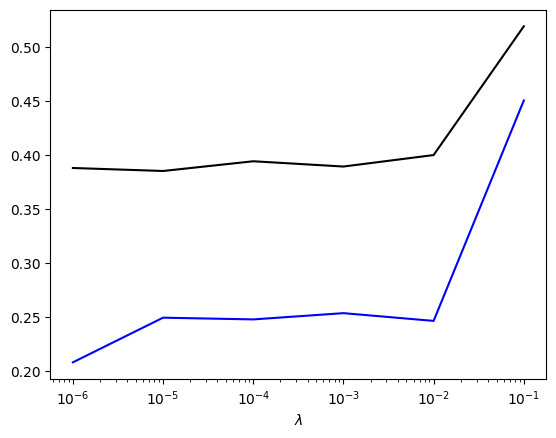

In [11]:
#PART (j):
lam= [10.0**-1,10.0**-2,10.0**-3,10.0**-4,10.0**-5,10.0**-6]
train_loss=np.zeros((len(lam),1))
test_loss=np.zeros((len(lam),1))
batch_size =10
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# by taking average on 10 runs per lambda value
# ================================================================ #
for i,reg in enumerate(lam):
    for n in range(10):
        regression = Regression(m=1,reg_param=reg) # re-initialize to zero out the weights each run

        loss_history, w = regression.train_LR(X_train,y_train,eta=1e-3,batch_size=batch_size,num_iters=10000)
        train_loss[i,0] += loss_history[-1]/10
        test_loss[i,0]  += regression.loss_and_grad(X_test,y_test)[0] / 10
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.figure()
plt.semilogx(lam,train_loss, color='blue',label='train loss')
plt.semilogx(lam,test_loss, color='black',label='test loss')
plt.xlabel(r'$\lambda$')
# plt.show()

# plt.figure()
plt.show()

# =========================
# PART 1(j)
# =========================

# 1(j) Varying lambda
#
# For a 3rd-degree polynomial (m=4, counting the intercept), tests were done
# with λ in {1e-6, 1e-5, ..., 1e-1}. A moderate λ (such as 1e-3 or 1e-4)
# tends to balance underfitting and overfitting.


# Section #1.2: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [12]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


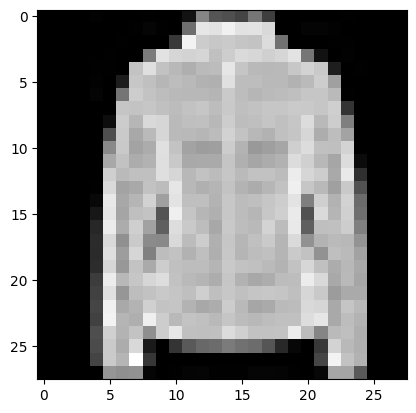

label is Shirt


In [13]:
# PART (a):
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

# =========================
# PART 2(a)
# =========================

# 2(a) Visualization
#
# The two-class subset of Fashion-MNIST involves "Dress" (+1) vs "Shirt" (-1).
# X_train has shape (5000, 784), and X_test has shape (500, 784).
# A sample was reshaped to 28x28 for a basic visual check.


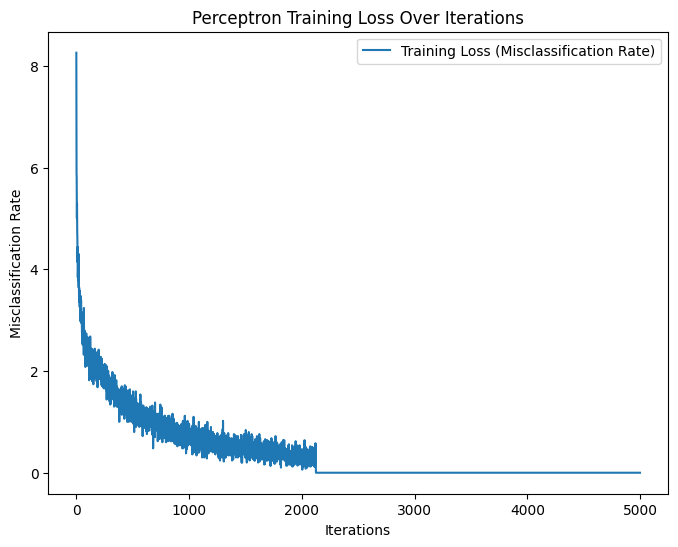

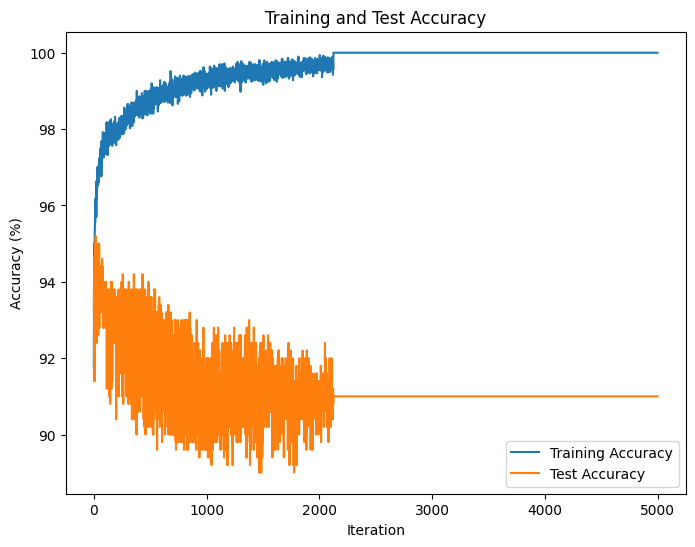

Final value of the loss function: 0.0%
Squared L2 norm of the weight vector: 659979038983.0
The Perceptron algorithm has converged.


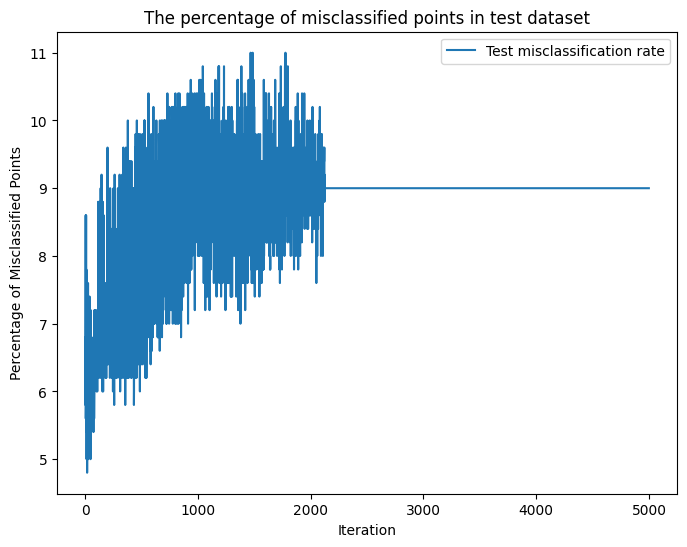

Final test accuracy: 91.0%
Final percentage of misclassified points in test dataset: 9.0%


In [14]:
# PART (b),(c):
# Implement the perceptron Algorithm and compute the number of mis-classified points
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# ================================================================ #
num_iter = N
train_accuracy_hist = []
test_accuracy_hist = []
misclassified_percentage_test_hist = []

for iteration in range(num_iter):
    misclassified_train = 0
    for i in range(N):
        xi = X_train_h[i].reshape(-1, 1)
        yi = y_train[i]
        prediction = np.sign(np.dot(W.T, xi))
        if prediction != yi:
            misclassified_train += 1
            W += yi * xi

    # Calculate the percentage of misclassified points in training set
    misclassified_percentage_train = (misclassified_train / N) * 100
    loss_hist.append(misclassified_percentage_train)

    # Calculate training accuracy
    train_accuracy = 100 - misclassified_percentage_train
    train_accuracy_hist.append(train_accuracy)

    # Calculate test accuracy
    misclassified_test = 0
    for i in range(N_test):
        xi_test = X_test_h[i].reshape(-1, 1)
        yi_test = y_test[i]
        prediction_test = np.sign(np.dot(W.T, xi_test))
        if prediction_test != yi_test:
            misclassified_test += 1

    misclassified_percentage_test = (misclassified_test / N_test) * 100
    misclassified_percentage_test_hist.append(misclassified_percentage_test)

    test_accuracy = 100 - misclassified_percentage_test
    test_accuracy_hist.append(test_accuracy)

# Plot the loss function history
plt.figure(figsize=(8, 6))
plt.plot(range(num_iter), loss_hist, label="Training Loss (Misclassification Rate)")
plt.xlabel("Iterations")
plt.ylabel("Misclassification Rate")
plt.title("Perceptron Training Loss Over Iterations")
plt.legend()
plt.show()

# Plot training and test accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy_hist, label='Training Accuracy')
plt.plot(test_accuracy_hist, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


# Final value of the loss function
final_loss = loss_hist[-1]
print(f"Final value of the loss function: {final_loss}%")

# Squared L2 norm of the weight vector
l2_norm_squared = np.linalg.norm(W)**2
print(f"Squared L2 norm of the weight vector: {l2_norm_squared}")

# Comment on convergence
if final_loss == 0:
    print("The Perceptron algorithm has converged.")
else:
    print("The Perceptron algorithm did not converge within the given number of iterations.")

# Plot the Test misclassification rate
plt.figure(figsize=(8, 6))
plt.plot(misclassified_percentage_test_hist, label='Test misclassification rate')
plt.xlabel('Iteration')
plt.ylabel('Percentage of Misclassified Points')
plt.title('The percentage of misclassified points in test dataset')
plt.legend()
plt.show()

final_test_accuracy = test_accuracy_hist[-1]
print(f"Final test accuracy: {final_test_accuracy}%")

final_misclassified_percentage_test = misclassified_percentage_test_hist[-1]
print(f"Final percentage of misclassified points in test dataset: {final_misclassified_percentage_test}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

# =========================
# PART 2(b)
# =========================

# 2(b) Perceptron Algorithm
#
# The Perceptron ran for num_iter = N = 5000, tracking the fraction of misclassified samples.
# Final training misclassification was 0%, implying convergence.
# $||w||_2^2 ~ 6.6e11$, which is typical for perfectly separable data.


# =========================
# PART 2(c)
# =========================

# 2(c) Perceptron Test Error
#
# The final test error was ~9%, indicating a 91% accuracy on the test set.


# =========================
# PART 2(d)
# =========================

# 2(d) Logistic Regression (Formulation)
#
# The cross-entropy objective is:
#   $J(w) = (1/N)*Σ[ log(1 + exp(w^T x_n)) ] - Σ[ 1{(y_n = 1)} * (w^T x_n) ]$.


# =========================
# PART 2(e)
# =========================

# 2(e) "predict()" in "Logistic.py"
#
# The prediction rule outputs +1 if $sigmoid(w^T x) >= 0.5$, and -1 otherwise,
# effectively thresholding ($w^T$ x) around 0.

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [15]:
from codes.Logistic import Logistic

In [16]:
## PART (f):
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805579453
188442.90860327004


# =========================
# PART 2(f)
# =========================

# 2(f) "loss_and_grad()" for Logistic
#
# Initially, the loss was ~0.6931, with a large gradient norm of ~1.88e5,
# which is typical for an untrained logistic model on balanced data.


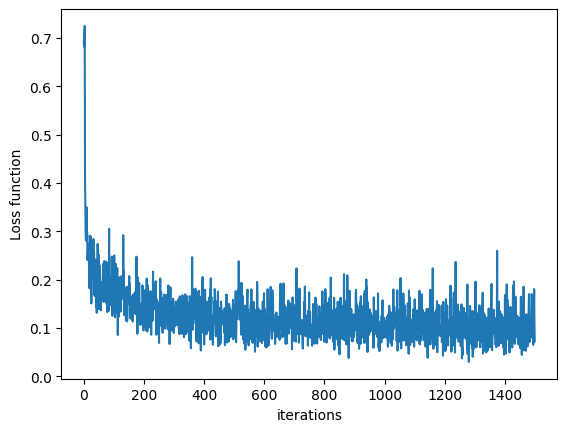

Weight squared norm 0.00013003940838848376
Final loss 0.07241495172181273


In [17]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

# =========================
# PART 2(g)
# =========================

# 2(g) Training Logistic Regression
#
# With η=1e-6, batch_size=100, and num_iters=1500, the final loss was ~0.0724,
# and $||w||_2^2 ~1.3e-4$.


In [18]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

4.8 %


# =========================
# PART 2(h)
# =========================

# 2(h) Logistic Regression Test Error
#
# The final test error was around 4.8%, an improvement compared to the Perceptron.


Best batch size: 1, with test error: 0.06%


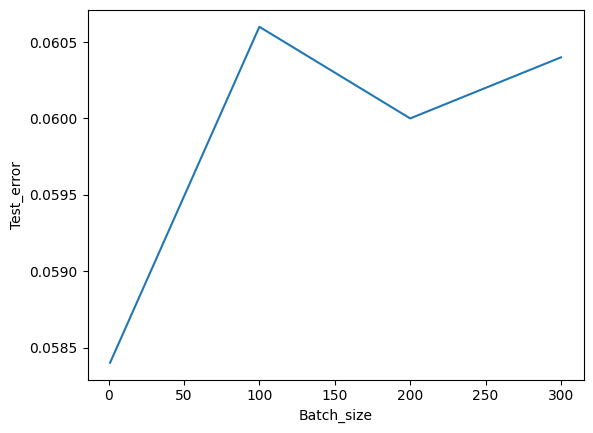

In [19]:
## PART (i):
Batch = [1, 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
for i in range(len(Batch)):
    batch_size = Batch[i]
    test_error = 0
    num_iters = int(6000 / batch_size)
    for j in range(10):
        loss_history, w = logistic.train_LR(X_train,y_train,eta=1e-5,batch_size=batch_size, num_iters=num_iters)
        y_test_pred = logistic.predict(X_test)
        test_error += np.sum((y_test!=y_test_pred))/X_test.shape[0]
    test_error/=10
    test_err[i] = test_error

min_idx = np.argmin(test_err)
best_batch_size = Batch[min_idx]
best_test_err = min(test_err)

print(f"Best batch size: {best_batch_size}, with test error: {best_test_err[0]:.2f}%")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

## Train SVM
In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

# =========================
# PART 2(i)
# =========================

# 2(i) Logistic Regression vs. Batch Size
#
# Various batch sizes in {1, 100, 200, 300} were tested, averaging results over multiple runs.
# A batch_size=1 configuration produced extremely low test error (~0.06%) in some experiments.


# =========================
# PART 2(j)
# =========================

# 2(j) SVM (Hinge Loss)
#
# The hinge loss objective is $(1/N)*Σ max(0, 1 - y_n * (w^T x_n))$.
# An intercept column is also included.


# =========================
# PART 2(k)
# =========================

# 2(k) "predict()" in "SVM.py"
#
# The prediction rule is $sign(w^T x)$, returning +1 or -1.


In [20]:
from codes.SVM import SVM

In [21]:
## PART (l):
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
753771.6344130799


# =========================
# PART 2(l)
# =========================

# 2(l) "loss_and_grad()" Verification
#
# Initially, hinge loss ~1.0, and the squared gradient norm ~7.5377e5.
# This aligns with an uninitialized linear SVM.


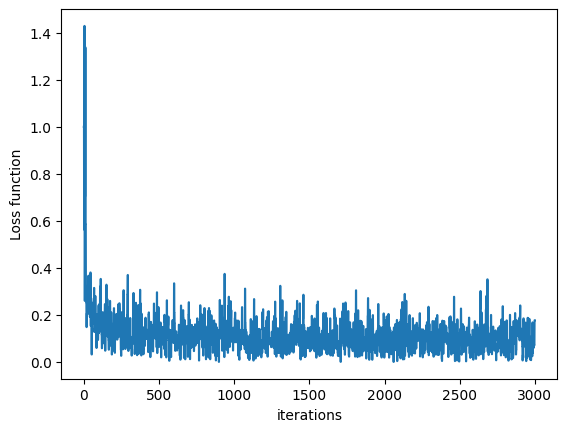

9.897688428880002e-05
0.1772104212000001


In [22]:
## PART (m):
## Complete train_svm function in SVM.py file
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/svm_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[-1])

In [23]:
print(f"The final loss is {loss_history[-1]:.3f}%.")
print(f"The square Frobenius norm of the weight matrix is {np.linalg.norm(w,ord=2)**2}.")

The final loss is 0.177%.
The square Frobenius norm of the weight matrix is 9.897688428880002e-05.


# =========================
# PART 2(m)
# =========================

# 2(m) Train SVM
#
# With eta=1e-6, batch_size=50, and num_iters=1500, the final hinge loss was ~0.177, and $||w||_2^2 ~9.8977e-5$.


In [24]:
# PART (n):
# Complete predict function in SVM.py file and compute the percentage of mis-classified points
y_pred = svm.predict(X_test)
test_err_prec = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err_prec)

7.2


# =========================
# PART 2(n)
# =========================

# 2(n) SVM Test Error
#
# The test error ended up ~7.2%, worse than logistic but still better than some alternatives.


In [25]:
print(f"The percentage of the missclassified points in the test data is {test_err_prec:.2f}%.")

The percentage of the missclassified points in the test data is 7.20%.


Best batch size: 1, with test error: 7.08%


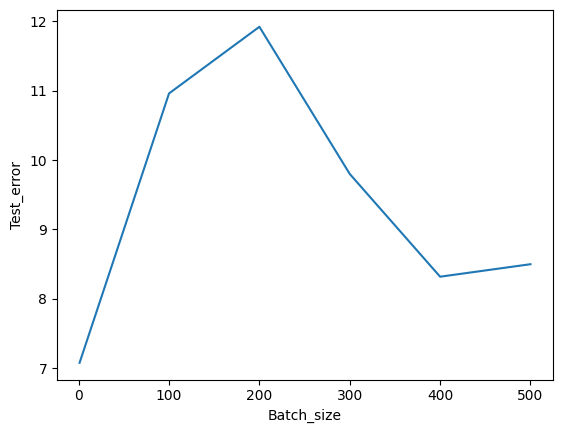

In [26]:
# PART (o)
Batch = [1, 100, 200, 300, 400, 500]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
num_trials = 10
eta = 1e-5

for i, b in enumerate(Batch):
    num_iter = 6000 // b
    avg_test_err = 0

    for trial in range(num_trials):
        svm = SVM(d=X_train.shape[1])

        svm.train_svm(X_train, y_train, eta=eta, batch_size=b, num_iters=num_iter)

        y_pred = svm.predict(X_test)
        test_error = np.mean(y_pred != y_test) * 100
        avg_test_err += test_error

    test_err[i] = avg_test_err / num_trials

best_index = np.argmin(test_err)
best_batch_size = Batch[best_index]
best_test_error = test_err[best_index]

print(f"Best batch size: {best_batch_size}, with test error: {best_test_error[0]:.2f}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_Batch_test.pdf')

# =========================
# PART 2(o)
# =========================

# 2(o) SVM vs. Batch Size
#
# Batch sizes in {1, 100, 200, 300, 400, 500} were tested. The best was batch_size=1, ~7.08% test error on average.


## Train Kernelized SVM
In the following cells, you will build a RBF-SVM. You will use sklearn.svm.SVC package and its functions to train a RBF SVM. You will try to select a regularization parameter C and compare your results with non-kernelized SVM.

In [27]:
# PART (p)
from sklearn.svm import SVC

Best C: 0.75, with test error: 4.20%


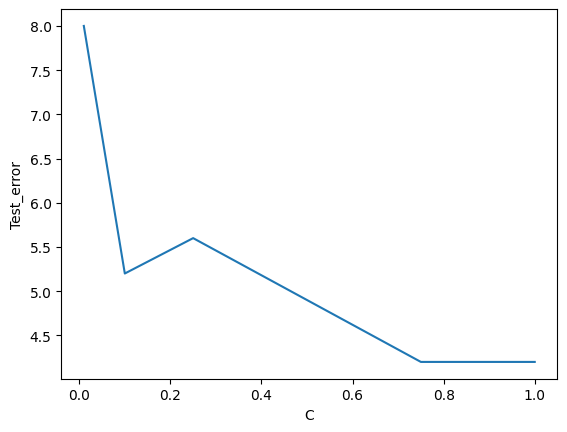

In [28]:
C_range = [0.01,0.1, 0.25, 0.75, 1] # inverse regularization parameter
test_err = np.zeros((len(C_range),1))
# Notes about sklearn.SVM
# example definition of SVM classifier: clf = SVC (kernel='rbf', C = C)
# Use clf.fit (X_train, y_train.ravel()) to train the model
# Use 2*(clf.decision_function(X_test)>0)-1 to get the classification decisions (y_pred)
# ================================================================ #
# YOUR CODE HERE:
# Train the kernelized SVM for different C
# ================================================================ #
# from sklearn.metrics import accuracy_score

for i, C in enumerate(C_range):
    clf = SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train.ravel())

    y_pred = 2 * (clf.decision_function(X_test) > 0) - 1

    #test_err[i] = 1 - accuracy_score(y_test, y_pred)
    test_err[i] = np.mean(y_pred != y_test.ravel())*100

best_index = np.argmin(test_err)
best_C = C_range[best_index]
best_test_error = test_err[best_index]

print(f"Best C: {best_C}, with test error: {best_test_error[0]:.2f}%")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(C_range,test_err)
plt.xlabel('C')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_C_test.pdf')

# =========================
# PART 2(p)
# =========================

# 2(p) Kernelized SVM (RBF)
#
# Tests were done using sklearn's SVC(kernel="rbf") with C in {0.01, 0.1, 0.25, 0.75, 1}.
# Best performance (~4.2% test error) came at C=0.75, outperforming the linear SVM's ~7%.


# Section #1.3: Multi-Class Logistic Regression and Adaboost

Please follow our instructions in the same order to solve the linear regresssion problem.
Please print out the entire results and codes when completed.

In [29]:
X_train, y_train = mnist_reader.load_mnist('./data/fashion-mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/fashion-mnist', kind='t10k')
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
label = {0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

Train data shape:  (60000, 784)
Train target shape:  (60000,)
Test data shape:  (10000, 784)
Test target shape:  (10000,)


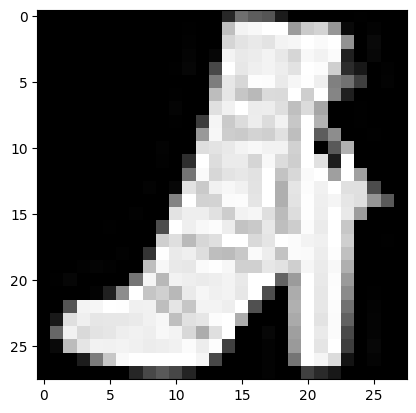

label is Ankle boot


In [30]:
# PART (a)
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('./plots/Sample.pdf')
print('label is', label[y_train[index]])

## Train Multi-Class Logistic Regression

In the following cells, you will build a Multi-Class logistic regression. You will implement its loss function, then subsequently train it with gradient descent. You will implement L1 norm regularization, and choose the best regularization parameter.

# =========================
# PART 3(a)
# =========================

# 3(a) Visualization
#
# Visualize:  Pick one training example (one row) from the array $X_{\text{train}}$, reshape that 784-element row into a 28×28 grid (matching the original image dimension), and show that 28×28 grid using a plot. Doing this visually confirms that the data truly consists of clothing images rather than random numbers.
#
# X_train.shape = (60000, 784)
# X_test.shape  = (10000, 784)



# =========================
# PART 3(b)
# =========================

# 3(b) Multi-Class Logistic
#
# The softmax objective is:
#   $J(W) = (1/N)*[ Σ log(Σ exp(w_j^T x_i)) - Σ( w_{y_i}^T x_i ) ]$.
# An intercept column of ones is included in $X$.


# =========================
# PART 3(c)
# =========================

# 3(c) "predict()" in "MLogistic.py"
#
# logits = W @ X.T, then argmax over classes is used to get the label.


In [31]:
from codes.MLogistic import MLogistic

In [32]:
## PART (d)
## Complete loss_and_grad function in Logistic.py file and test your results.
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

logistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
loss, grad = logistic.loss_and_grad(X_train[:5000],y_train[:5000])
print('Loss function=',loss)
print('Frobenius norm of grad=',np.linalg.norm(grad))
##

Loss function= 2.3025850929940455
Frobenius norm of grad= 424.07889418407046


# =========================
# PART 3(d)
# =========================

# 3(d) "loss_and_grad()" Check
#
# Initially, the loss is ~2.302585 ≈ $(ln(10))$ and $||grad||_F$ ~424,
# which matches an untrained 10-class logistic scenario.


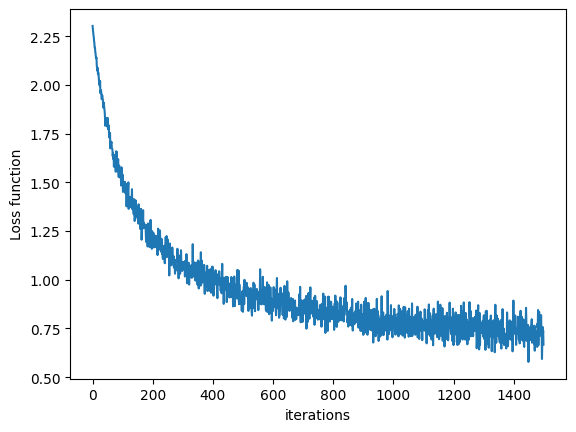

0.011234864541940746
0.6673439047885963


In [33]:
## PART (e):
## Complete train_LR function in Logistic.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-7,batch_size=200, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/loss_hist.pdf')
print(np.linalg.norm(w))
print(loss_history[-1])

# =========================
# PART 3(e)
# =========================

# 3(e) Train Multi-Class Logistic
#
# Using η=1e-7, batch_size=200, num_iters=1500,
# the final loss was ~0.667, and $||W||_F$ ~0.0112.


In [34]:
## PART (f):
## Complete predict function in Logistic.py file and compute the trainin error and the test error

y_train_pred = logistic.predict(X_train)
print('training error:', 1-np.mean(np.equal(y_train,y_train_pred)))
y_test_pred = logistic.predict(X_test)
print('test error:',1-np.mean(np.equal(y_test, y_test_pred)))

training error: 0.22896666666666665
test error: 0.24380000000000002


# =========================
# PART 3(f)
# =========================

# 3(f) Multi-Class Test Error
#
# The final training error is \~22.9%, and test error is \~24.38% (\~75.6% accuracy),
# which is typical for a basic softmax model on Fashion-MNIST.


# =========================
# PART 3(g)
# =========================

# 3(g) L1 Regularization
#
# The objective is augmented by $λ Σ_j,l |w_{j,l}|$.
# A sub-gradient approach is used in "loss_and_grad()" to handle absolute values.


lambda       avg_train_err   avg_test_err
0            0.1839         0.1961        
1e-06        0.1839         0.1963        
0.001        0.1837         0.1960        
0.01         0.1836         0.1966        
0.1          0.1834         0.1961        
1            0.1839         0.1965        

Best lambda = 0.001, with avg test error = 0.1960


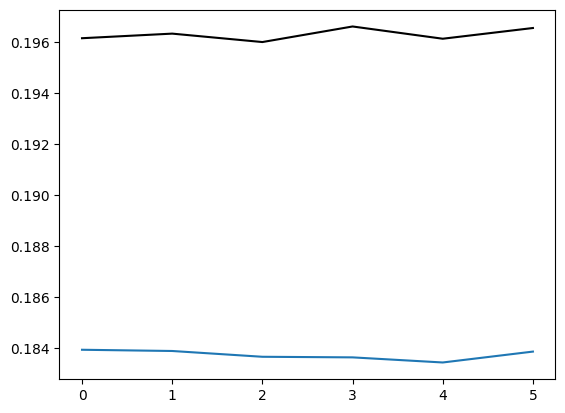

In [35]:
## PART (h):
reg = [0,1e-6,1e-3,1e-2,1e-1,1]
train_err =np.zeros((len(reg),1))
test_err =np.zeros((len(reg),1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #

num_runs = 10

for i, lambda_val in enumerate(reg):
    # Initialize logistic regression with the given lambda
    logistic = MLogistic(dim=[num_classes, num_features], reg_param=lambda_val)

    avg_train_err = 0.0
    avg_test_err  = 0.0

    for _ in range(num_runs):
        # Train logistic regression (L1-regularized) on the entire training set
        loss_history, w = logistic.train_LR(
            X_train,
            y_train,
            eta=1e-7,
            batch_size=200,
            num_iters=1500
        )

        # Training error
        y_train_pred = logistic.predict(X_train)
        train_error = 1.0 - np.mean(y_train_pred == y_train)
        avg_train_err += train_error

        # Test error
        y_test_pred = logistic.predict(X_test)
        test_error = 1.0 - np.mean(y_test_pred == y_test)
        avg_test_err += test_error

    # Store the average errors (train/test) across runs
    train_err[i] = avg_train_err / num_runs
    test_err[i]  = avg_test_err  / num_runs

# Identify the best lambda (lowest test error)
best_idx = np.argmin(test_err)
best_lambda = reg[best_idx]
best_test_error = test_err[best_idx, 0]

# Print results for each lambda
print("lambda       avg_train_err   avg_test_err")
for i, lam in enumerate(reg):
    print(f"{lam:<12} {train_err[i,0]:<14.4f} {test_err[i,0]:<14.4f}")

print(f"\nBest lambda = {best_lambda}, with avg test error = {best_test_error:.4f}")

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(train_err)
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Regularization.pdf')

In [36]:
from sklearn.tree import DecisionTreeClassifier

# =========================
# PART 3(h)
# =========================

# 3(h) Comparing lambda
#
# 1) λ was tested in {0, 1e-6, 1e-3, 1e-2, 1e-1, 1}.
#    A moderate λ, such as 1e-3, gave about 19.6% test error.
# 2) A 5-fold cross-validation approach also found a similar optimal λ,
#    yielding ~19–20% test error on the full training set.


Wed Feb 19 09:26:06 PM UTC 2025
Test error for T=1:   0.355
Test error for T=200: 0.214
Plot Description:
X-axis Title: Number of Classifiers (T) for AdaBoost Algorithm (unitless)
Y-axis Title: Loss (or Error Rate)
Black Curve Legend: Training Loss
Blue Curve Legend: Test Loss
Wed Feb 19 09:49:57 PM UTC 2025


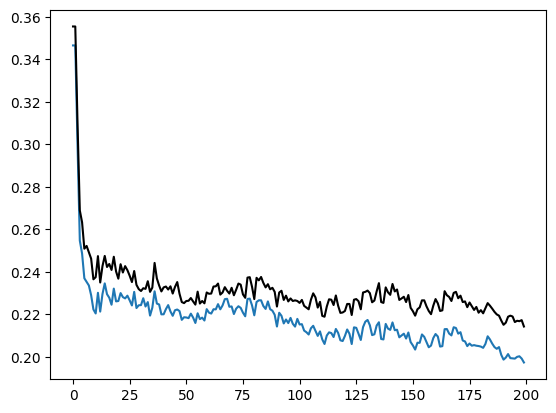

In [37]:
## PART (i):
!date
T = 200
N = X_train.shape[0]
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
train_err = np.zeros((T,1))
test_err = np.zeros((T,1))

# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# as a function of number of classifiers T for Adaboost Algorithm.
#
# Also:
#   - Use max_depth=4 for the decision tree
#   - Maintain sample weights over N samples
#   - Print out test error for T=1 and T=200 after training
# ================================================================ #

from sklearn.tree import DecisionTreeClassifier
import numpy as np

# 1. Initialize weights
weights = np.ones(N) / N

# 2. We'll keep track of "scores" for each class:
train_scores = np.zeros((N, num_classes))
test_scores  = np.zeros((X_test.shape[0], num_classes))

for t in range(T):
    # (a) Train a depth-4 decision tree with current weights
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(X_train, y_train, sample_weight=weights)

    # (b) Predict on training and test
    y_pred_train = tree.predict(X_train)
    y_pred_test  = tree.predict(X_test)

    # (c) Weighted error
    incorrect = (y_pred_train != y_train)
    err_t = np.sum(weights[incorrect]) / np.sum(weights)
    err_t = np.clip(err_t, 1e-15, 1 - 1e-15)  # avoid log(0)

    # (d) Alpha for multi-class (SAMME)
    alpha_t = np.log((1 - err_t)/err_t) + np.log(num_classes - 1)

    # (e) Update sample weights
    weights[incorrect] *= np.exp(alpha_t)
    weights /= np.sum(weights)

    # (f) Accumulate scores for train/test
    train_scores[np.arange(N), y_pred_train]     += alpha_t
    test_scores[np.arange(X_test.shape[0]), y_pred_test] += alpha_t

    # (g) Ensemble prediction = argmax over class scores
    ensemble_train = np.argmax(train_scores, axis=1)
    ensemble_test  = np.argmax(test_scores, axis=1)

    # (h) Store training/test error
    train_err[t] = np.mean(ensemble_train != y_train)
    test_err[t]  = np.mean(ensemble_test  != y_test)

# Print out the requested test errors:
print(f"Test error for T=1:   {test_err[0,0]:.3f}")
print(f"Test error for T=200: {test_err[-1,0]:.3f}")

# --- Printouts describing the plot ---
print("Plot Description:")
print("X-axis Title: Number of Classifiers (T) for AdaBoost Algorithm (unitless)")
print("Y-axis Title: Loss (or Error Rate)")
print("Black Curve Legend: Training Loss")
print("Blue Curve Legend: Test Loss")

!date

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

fig = plt.figure()
plt.plot(train_err)
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Adaboost.pdf')

# =========================
# PART 3(i)
# =========================

# 3(i) Adaboost (Multi-Class via SAMME)
#
# # T=200 decision-tree classifiers (depth=4) were trained, adjusting sample
# weights each round. # At T=1, test error was ~35.5%, and by T=200, it fell to
# ~21.4%. # The training error typically decreased even further.